In [1]:
import numpy as np
import math
from math import pi
from math import factorial
from matplotlib import pyplot as plt

## Prof. Katie's FFT code

In [33]:
def fft(f):
    n = len(f)
    if n <= 1:
        return f
    else:
        even = fft(f[0::2]) #Start at 0 and take every second entry.
        odd = fft(f[1::2])
        
        T = [np.exp(-2j*np.pi*k/n)*odd[k] for k in range (n//2)]
        
        return [even[k] + T[k] for k in range(n//2)] + \
               [even[k] - T[k] for k in range(n//2)]

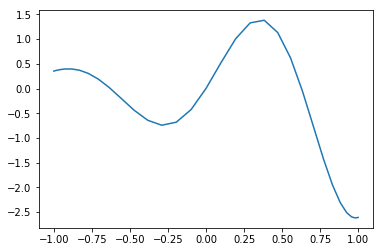

In [34]:
N = 32
theta = np.linspace(0,np.pi,N+1)
x = np.cos(theta)
f = np.exp(x)*np.sin(5*x)
plt.plot(x,f)

In [35]:
F = np.hstack([f,f[-2:0:-1]])
fhat = fft(F)
k1 = np.array(range(0,N+1))
k2 = np.array(range(0,N))*(-1)
kt = np.hstack([k1,k2[-1:0:-1]])

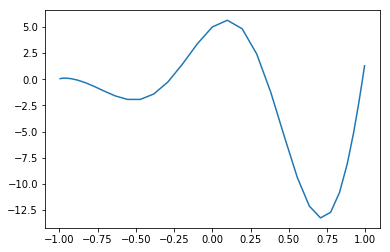

In [36]:
what = fhat*kt*1j
w = np.zeros(N+1)
for j in range(0,N+1):
    w[j] = np.real(sum((np.e**((1j*np.pi*j*kt)/N))*what)/(2*N))
fp = w[1:N]*(-1/(np.sqrt(1-x[1:N]))) #Omit the endpoints and append them by solving analytically.
plt.plot(x[1:N],fp)

In [ ]:
def Cheb(f,x): #Need to edit; this is just ChebDiff copy and paste.
    N = len(x)-1
    F = np.hstack([f,f[-2:0:-1]])
    fhat = fft(F)
    k1 = np.array(range(0,N+1))
    k2 = np.array(range(0,N))*(-1)
    kt = np.hstack([k1,k2[-1:0:-1]])
    what = fhat*kt*1j
    w = np.zeros(N+1)
    for j in range(0,N+1):
        w[j] = np.real(sum((np.e**((1j*np.pi*j*kt)/N))*what)/(2*N))
    fp = w[1:N]*(-1/(np.sqrt(1-x[1:N]))) #Omit the endpoints and append them by solving analytically.
    return(fp)

In [28]:
def ChebDiff(f,x):
    N = len(x)-1
    F = np.hstack([f,f[-2:0:-1]])
    fhat = fft(F)
    k1 = np.array(range(0,N+1))
    k2 = np.array(range(0,N))*(-1)
    kt = np.hstack([k1,k2[-1:0:-1]])
    what = fhat*kt*1j
    w = np.zeros(N+1)
    for j in range(0,N+1):
        w[j] = np.real(sum((np.e**((1j*np.pi*j*kt)/N))*what)/(2*N))
    fp = w[1:N]*(-1/(np.sqrt(1-x[1:N]))) #Omit the endpoints and append them by solving analytically.
    return(fp)

32
64
64


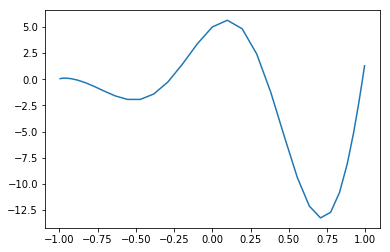

In [42]:
plt.plot(x[1:N],ChebDiff(f,x))